<a href="https://colab.research.google.com/github/MegatronRobot/FastAI_Practical_DL_for_coders_Coursefiles/blob/main/Getting_Started/four_animals_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Classifying Dog, Cat, Human, Horse

In [1]:
!pip install duckduckgo_search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.3 MB/s eta 0:00:00


In [2]:
from duckduckgo_search import ddg_images
from fastcore.all import *

In [3]:
def search_images(term, max_images=30):
  print(f"Searching for '{term}'")
  return L(ddg_images(term, max_results=max_images)).itemgot("image")

In [4]:
url_dog = search_images("dog photo", 1)
url_cat = search_images("cat photo", 1)
url_human = search_images("human photo", 1)
url_horse = search_images("horse photo", 1)
print(url_dog[0], url_cat[0], url_human[0], url_horse[0])

Searching for 'dog photo'


/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


Searching for 'cat photo'
Searching for 'human photo'
Searching for 'horse photo'
https://inspirationseek.com/wp-content/uploads/2016/02/Cute-Dog-Photography.jpg https://static.pexels.com/photos/45201/kitty-cat-kitten-pet-45201.jpeg https://i.pinimg.com/originals/f8/f2/d9/f8f2d914b1f4848b3d4c3f4443f52f59.jpg http://cdn0.wideopenpets.com/wp-content/uploads/2017/03/AdobeStock_83729458.jpeg


In [5]:
urls = [url_dog, url_cat, url_human, url_horse]

In [6]:
from fastdownload import download_url
dest=["dog.jpg","cat.jpg","human.jpg","horse.jpg"]
for _ in range(4):
  download_url(urls[_][0], dest[_], show_progress=True)

In [7]:
from fastai.vision.all import *

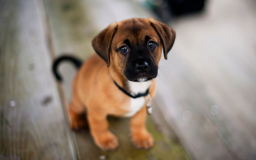

In [8]:
im = Image.open(dest[0])
im.to_thumb(256, 256)

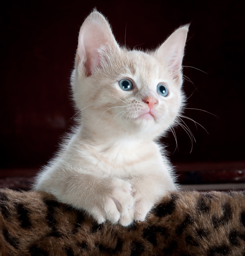

In [9]:
im1 = Image.open(dest[1])
im1.to_thumb(256, 256)

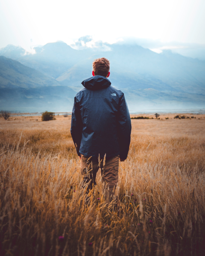

In [10]:
im2 = Image.open(dest[2])
im2.to_thumb(256, 256)

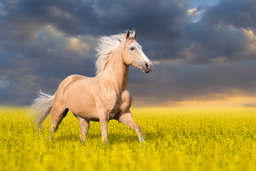

In [11]:
im3 = Image.open(dest[3])
im3.to_thumb(256, 256)

In [15]:
# downloading a batch of images
searches = ["cat", "dog", "human", "horse"]
path = Path("four_animals_classification")
from time import sleep

for o in searches:
  dest=(path/o)
  dest.mkdir(exist_ok=True, parents=True)
  download_images(dest, urls=search_images(f'{o} photo'))
  sleep(10)
  download_images(dest, urls=search_images(f'{o} sun photo'))
  sleep(10)
  download_images(dest, urls=search_images(f'{o} shade photo'))
  sleep(10)
  resize_images(path/o, max_size=400, dest=path/o)

Searching for 'cat photo'
Searching for 'cat sun photo'
Searching for 'cat shade photo'
Searching for 'dog photo'
Searching for 'dog sun photo'
Searching for 'dog shade photo'
Searching for 'human photo'
Searching for 'human sun photo'
Searching for 'human shade photo'
Searching for 'horse photo'
Searching for 'horse sun photo'
Searching for 'horse shade photo'


In [16]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

13

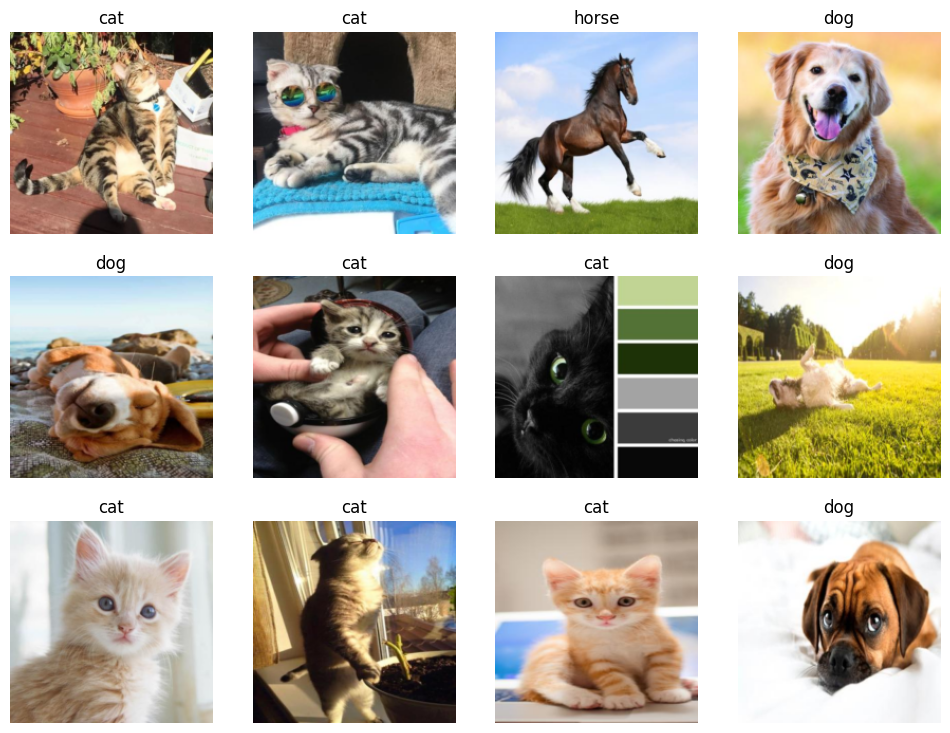

In [17]:
# Data block
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method="squish")]
).dataloaders(path)

dls.show_batch(max_n=12)

In [18]:
# learning using resnet 18, fine tuning it
learn = vision_learner(dls, resnet18, metrics=error_rate)

learn.fine_tune(10)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 144MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.937714,0.900688,0.333333,00:46


epoch,train_loss,valid_loss,error_rate,time
0,0.776380,0.566067,0.217949,00:52
1,0.576973,0.365197,0.166667,00:58
2,0.419701,0.302284,0.128205,00:54
3,0.321610,0.292869,0.128205,00:54
4,0.252682,0.308644,0.115385,00:53
5,0.204361,0.303288,0.115385,00:53
6,0.169476,0.293411,0.102564,00:52
7,0.144178,0.289805,0.102564,00:53
8,0.123352,0.295745,0.115385,00:54
9,0.107727,0.297021,0.128205,00:54


In [19]:
is_hum, _, probs = learn.predict(PILImage.create("mukul.jpg"))
print(f"This is a {is_hum}")
print(f"Probability of it being human is {probs}")

This is a human
Probability of it being human is tensor([6.1268e-04, 1.0588e-05, 1.1043e-05, 9.9937e-01])


In [20]:
is_hum1, _, probs = learn.predict(PILImage.create("rohan.jpg"))
print(f"This is a {is_hum1}")
print(f"Probability of it being human is {probs}")

This is a human
Probability of it being human is tensor([4.5992e-06, 5.0915e-06, 6.4141e-06, 9.9998e-01])


In [21]:
is_hum2, _, probs = learn.predict(PILImage.create("pigeon.jpg")) # bad data
print(f"This is a {is_hum2}")
print(f"Probability of it being human is {probs}")

This is a human
Probability of it being human is tensor([0.0072, 0.0536, 0.0126, 0.9266])


In [22]:
is_cat, _, probs = learn.predict(PILImage.create("cat.jpg"))
print(f"This is a {is_cat}")
print(f"Probability of it being cat is {probs}")

This is a cat
Probability of it being cat is tensor([1.0000e+00, 1.0508e-08, 5.5446e-09, 5.1886e-08])
